In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [105]:
warnings.filterwarnings('ignore')

In [106]:
data = pd.read_csv("/content/BHARTIARTL.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [107]:
data.drop(['Date'], axis=1, inplace=True)

In [108]:
print(data.head())
print(data.shape)
print(data.columns)

   Symbol Series  Prev Close   Open   High    Low   Last  Close   VWAP  \
0  BHARTI     EQ        0.00  51.90  51.90  43.50  44.70  44.35  46.00   
1  BHARTI     EQ       44.35  45.15  45.15  41.30  41.35  41.70  42.58   
2  BHARTI     EQ       41.70  40.60  42.80  40.25  41.20  41.25  41.56   
3  BHARTI     EQ       41.25  42.85  43.40  42.15  42.20  42.40  42.76   
4  BHARTI     EQ       42.40  42.65  43.60  41.10  43.35  43.30  42.75   

     Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  10381190  4.775431e+13     NaN           6503775.0       0.6265  
1   3552660  1.512609e+13     NaN           1741184.0       0.4901  
2   2512964  1.044348e+13     NaN                 NaN          NaN  
3   1338196  5.722681e+12     NaN            485969.0       0.3632  
4    811327  3.468413e+12     NaN            399133.0       0.4920  
(4774, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'D

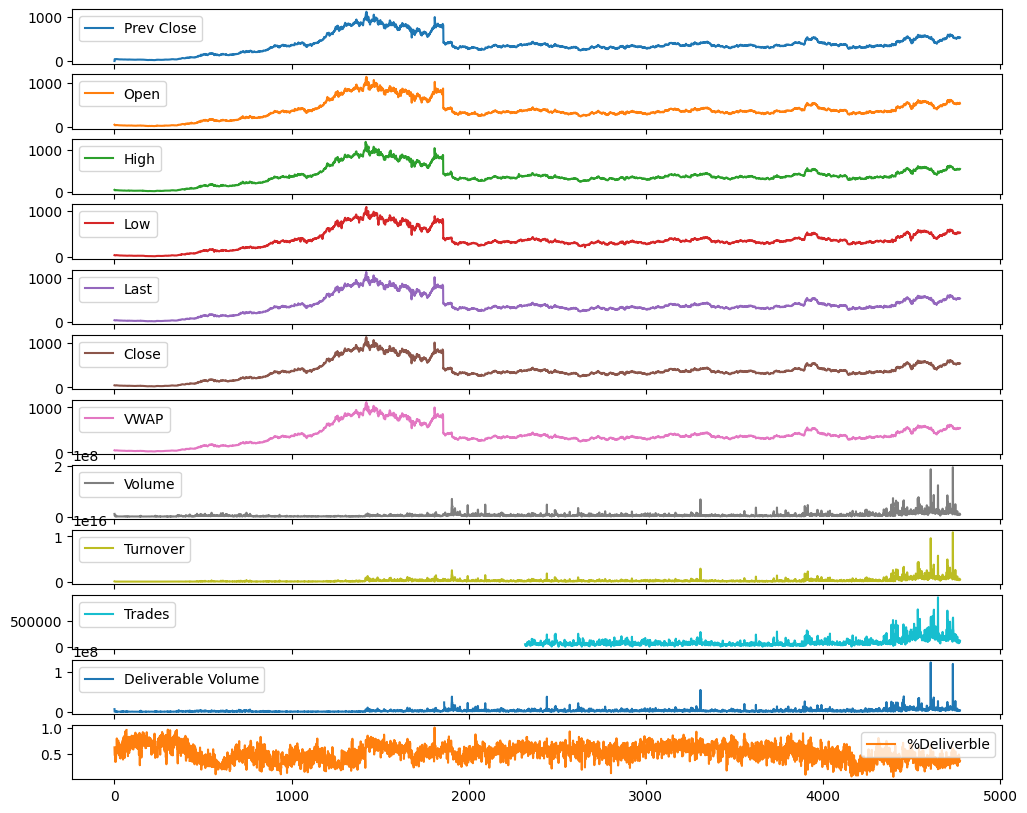

Symbol                   2
Series                   1
Prev Close            3551
Open                  2773
High                  3121
Low                   3241
Last                  3205
Close                 3551
VWAP                  4461
Volume                4774
Turnover              4774
Trades                2431
Deliverable Volume    4756
%Deliverble           3205
dtype: int64

In [109]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [110]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


          Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0         BHARTI     EQ        0.00   51.90   51.90   43.50   44.70   44.35   
1         BHARTI     EQ       44.35   45.15   45.15   41.30   41.35   41.70   
2         BHARTI     EQ       41.70   40.60   42.80   40.25   41.20   41.25   
3         BHARTI     EQ       41.25   42.85   43.40   42.15   42.20   42.40   
4         BHARTI     EQ       42.40   42.65   43.60   41.10   43.35   43.30   
...          ...    ...         ...     ...     ...     ...     ...     ...   
4769  BHARTIARTL     EQ      522.60  522.75  528.50  522.75  527.20  527.55   
4770  BHARTIARTL     EQ      527.55  527.45  538.55  526.25  535.50  534.30   
4771  BHARTIARTL     EQ      534.30  535.95  548.00  535.60  543.75  544.30   
4772  BHARTIARTL     EQ      544.30  549.70  550.00  539.10  540.20  540.85   
4773  BHARTIARTL     EQ      540.85  533.50  547.00  533.50  535.50  536.75   

        VWAP    Volume      Turnover    Trades  Del

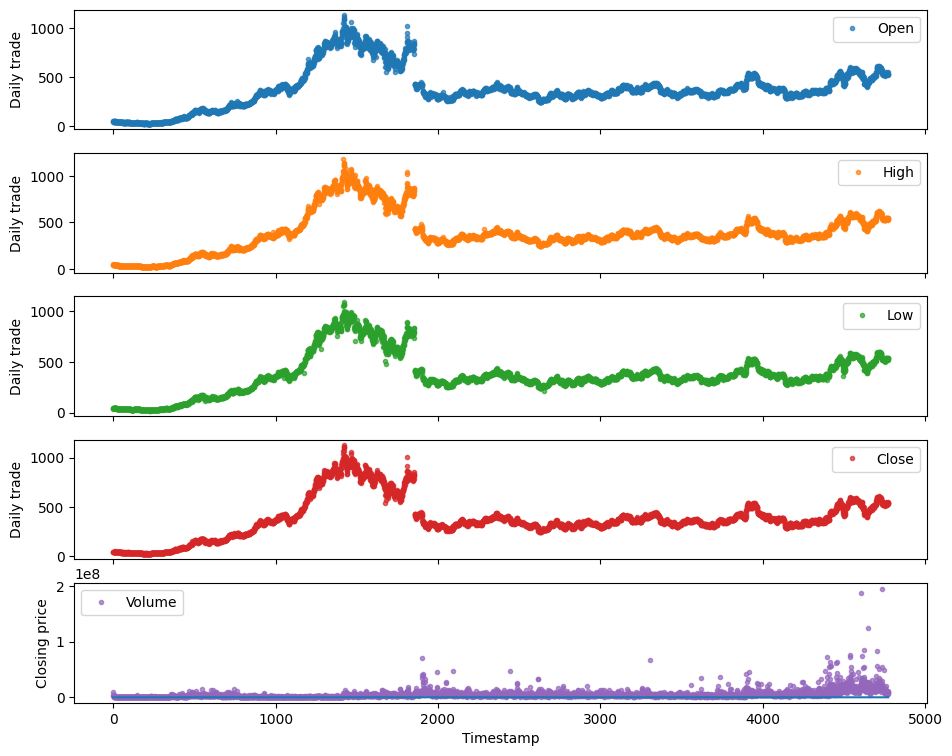

In [111]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [112]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2318
Deliverable Volume      16
%Deliverble             16
dtype: int64

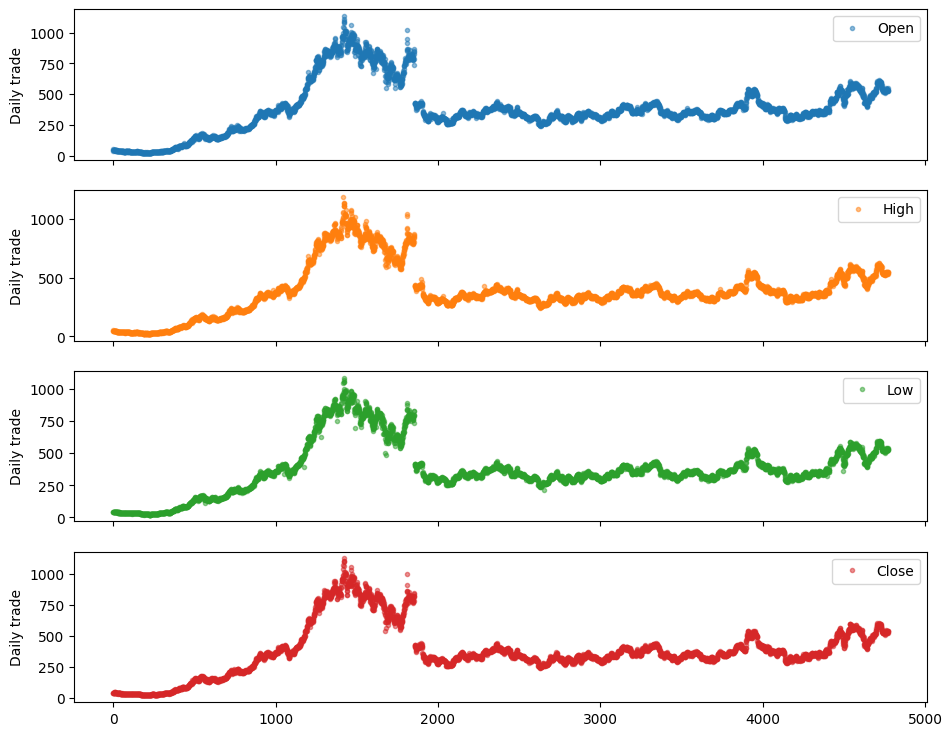

In [113]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0         BHARTI     EQ        0.00   51.90   51.90   43.50   44.70   44.35   
1         BHARTI     EQ       44.35   45.15   45.15   41.30   41.35   41.70   
2         BHARTI     EQ       41.70   40.60   42.80   40.25   41.20   41.25   
3         BHARTI     EQ       41.25   42.85   43.40   42.15   42.20   42.40   
4         BHARTI     EQ       42.40   42.65   43.60   41.10   43.35   43.30   
...          ...    ...         ...     ...     ...     ...     ...     ...   
4769  BHARTIARTL     EQ      522.60  522.75  528.50  522.75  527.20  527.55   
4770  BHARTIARTL     EQ      527.55  527.45  538.55  526.25  535.50  534.30   
4771  BHARTIARTL     EQ      534.30  535.95  548.00  535.60  543.75  544.30   
4772  BHARTIARTL     EQ      544.30  549.70  550.00  539.10  540.20  540.85   
4773  BHARTIARTL     EQ      540.85  533.50  547.00  533.50  535.50  536.75   

        VWAP    Volume      Turnover    Trades  Del

,count,mean,std,min,25%,50%,75%,max
Prev Close,4774.0,3.796883e+02,2.072373e+02,0.000000e+00,3.013250e+02,3.488000e+02,4.238500e+02,1.125650e+03
Open,4774.0,3.804785e+02,2.077740e+02,2.110000e+01,3.020000e+02,3.490000e+02,4.250000e+02,1.133900e+03
High,4774.0,3.870348e+02,2.120374e+02,2.160000e+01,3.068250e+02,3.539250e+02,4.313125e+02,1.184200e+03
Low,4774.0,3.727052e+02,2.022706e+02,2.065000e+01,2.965750e+02,3.435000e+02,4.172500e+02,1.090250e+03
Last,4774.0,3.797985e+02,2.071633e+02,2.070000e+01,3.011625e+02,3.485750e+02,4.232750e+02,1.131350e+03
Close,4774.0,3.798008e+02,2.071769e+02,2.075000e+01,3.014000e+02,3.488000e+02,4.239375e+02,1.125650e+03
VWAP,4774.0,3.798249e+02,2.069530e+02,2.096000e+01,3.013900e+02,3.487500e+02,4.242975e+02,1.113580e+03
Volume,4774.0,5.341070e+06,7.976471e+06,2.824600e+04,1.838864e+06,3.474614e+06,5.922892e+06,1.948880e+08
Turnover,4774.0,2.245218e+14,4.014405e+14,7.373966e+10,5.580891e+13,1.268449e+14,2.382761e+14,1.090756e+16
Trades,2456.0,8.513337e+04,7.513613e+04,1.392000e+03,4.333100e+04,6.223150e+04,9.736175e+04,9.467050e+05


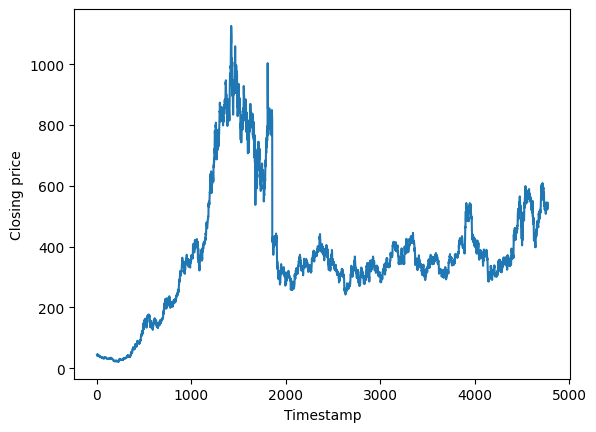

In [114]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [115]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3737
935


In [116]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
59/59 [==============================] - 4s 18ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1170 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0514
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0426 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0378
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0343 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0317
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0309 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0288
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0290 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0270
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0277 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0261
Epoch 7/100
59/59 [==

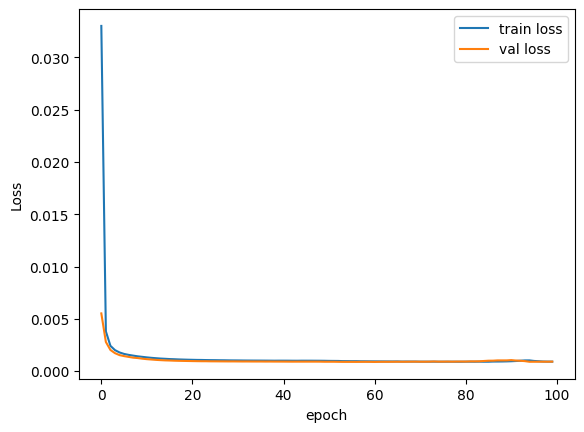

In [117]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

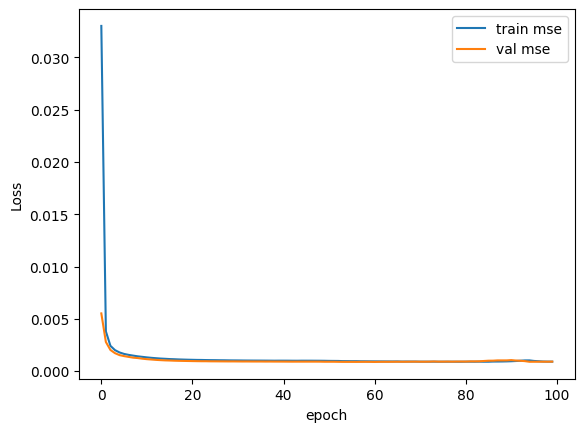

In [118]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

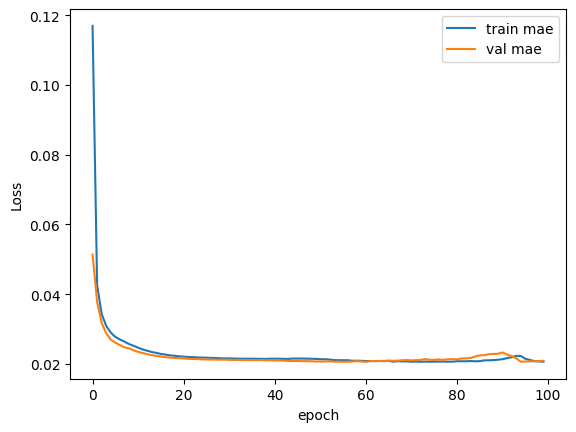

In [119]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_9 (LSTM)               (None, 32)                6272      
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 activation_13 (Activation)  (None, 64)               

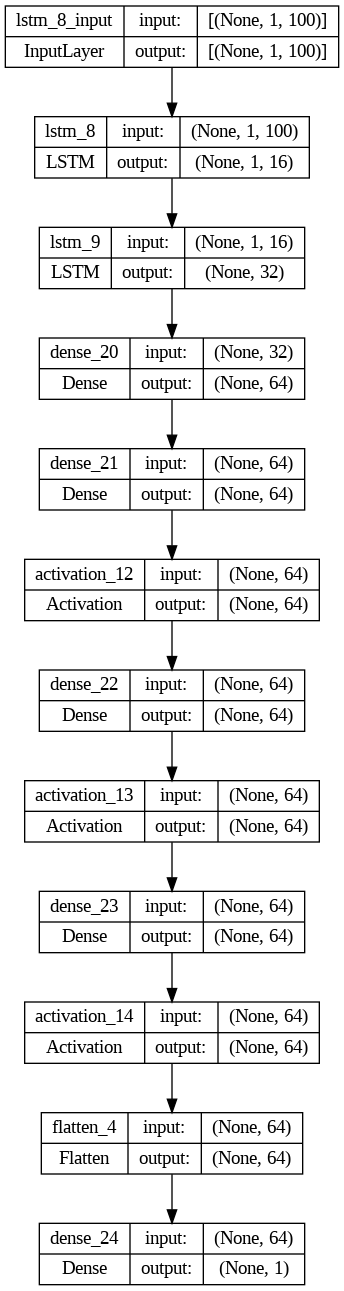

In [120]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [121]:
model.evaluate(test_X, test_Y)

30/30 [==============================] - 0s 1ms/step - loss: 9.0905e-04 - mse: 9.0905e-04 - mae: 0.0209


[0.0009090533130802214, 0.0009090533130802214, 0.02089662104845047]

In [122]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.990218
R2 Score: 0.990183
Max Error: 0.252053


30/30 [==============================] - 0s 1ms/step


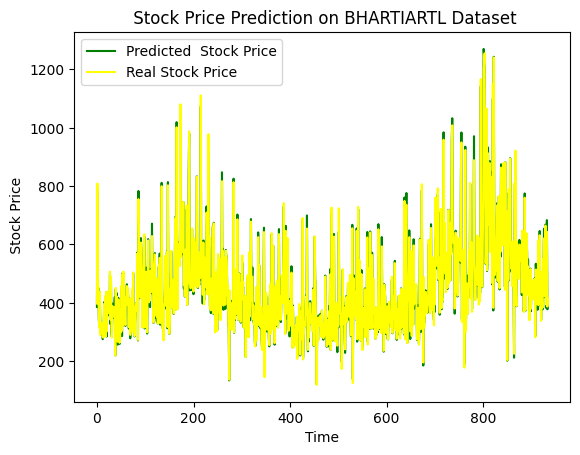

In [123]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on BHARTIARTL Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

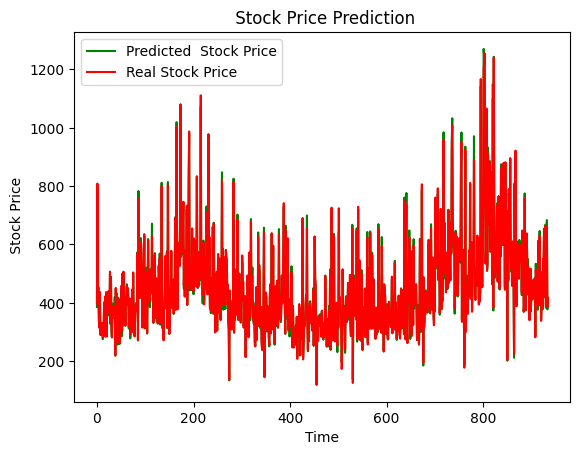

In [124]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [125]:
predicted

array([[ 385.75308 ],
       [ 784.91675 ],
       [ 434.6203  ],
       [ 450.81195 ],
       [ 339.69827 ],
       [ 320.03186 ],
       [ 436.16464 ],
       [ 311.69095 ],
       [ 309.80383 ],
       [ 289.69556 ],
       [ 328.28067 ],
       [ 299.0321  ],
       [ 275.43018 ],
       [ 284.21014 ],
       [ 318.15552 ],
       [ 402.33264 ],
       [ 352.7175  ],
       [ 420.90533 ],
       [ 307.25482 ],
       [ 435.36252 ],
       [ 284.3086  ],
       [ 362.83582 ],
       [ 420.85773 ],
       [ 414.1377  ],
       [ 430.58444 ],
       [ 372.8959  ],
       [ 355.4249  ],
       [ 498.79865 ],
       [ 327.0278  ],
       [ 484.36688 ],
       [ 299.3153  ],
       [ 282.7463  ],
       [ 397.4998  ],
       [ 349.07156 ],
       [ 370.63376 ],
       [ 348.1519  ],
       [ 382.0868  ],
       [ 420.07928 ],
       [ 219.66345 ],
       [ 447.7437  ],
       [ 352.43967 ],
       [ 433.20056 ],
       [ 295.86285 ],
       [ 256.57776 ],
       [ 417.1318  ],
       [ 4

In [126]:
test_label

array([[ 397.6218827 ],
       [ 808.87229219],
       [ 442.88773073],
       [ 454.46877099],
       [ 350.8490907 ],
       [ 314.56090072],
       [ 436.97914157],
       [ 289.56467854],
       [ 309.13794497],
       [ 297.91824115],
       [ 331.45156346],
       [ 294.3021551 ],
       [ 282.50059302],
       [ 280.80627565],
       [ 330.28283942],
       [ 396.40321817],
       [ 342.69966717],
       [ 421.73711994],
       [ 284.05060956],
       [ 436.28775422],
       [ 301.5910578 ],
       [ 357.02034884],
       [ 430.93645307],
       [ 422.95493053],
       [ 440.44598012],
       [ 364.71442401],
       [ 365.79840524],
       [ 506.97165245],
       [ 342.47823364],
       [ 489.40747542],
       [ 321.71004333],
       [ 281.09345435],
       [ 389.03416557],
       [ 354.05916492],
       [ 374.70703787],
       [ 353.18705205],
       [ 383.38068536],
       [ 385.67772891],
       [ 218.90829482],
       [ 451.04084881],
       [ 361.01410804],
       [ 421.637

In [127]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      397.621883       385.753082
1      808.872292       784.916748
2      442.887731       434.620300
3      454.468771       450.811951
4      350.849091       339.698273
..            ...              ...
930    394.615791       383.166595
931    533.171226       523.404907
932    643.372777       683.389832
933    386.977315       377.716431
934    417.167743       416.314087

[935 rows x 2 columns]


In [128]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 397.6218827040352  | 385.7530822753906  |
|  1  | 808.8722921914357  |  784.916748046875  |
|  2  | 442.88773072747006 | 434.62030029296875 |
|  3  | 454.46877098723974 | 450.81195068359375 |
|  4  | 350.84909069713217 | 339.6982727050781  |
|  5  | 314.56090071647907 | 320.0318603515625  |
|  6  | 436.97914156626507 | 436.1646423339844  |
|  7  | 289.56467854376456 | 311.6909484863281  |
|  8  | 309.13794497405576 | 309.8038330078125  |
|  9  | 297.91824115424254 |  289.695556640625  |
| 10  | 331.45156345800126 | 328.2806701660156  |
| 11  |  294.302155104609  | 299.0321044921875  |
| 12  | 282.50059301503984 |  275.43017578125   |
| 13  | 280.80627564566737 | 284.21014404296875 |
| 14  | 330.2828394210889  |  318.155517578125  |
| 15  | 396.4032181732135  | 402.3326416015625  |
| 16  | 342.6996671709531  | 352.7174987792969  |


In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_9 (LSTM)               (None, 32)                6272      
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 activation_13 (Activation)  (None, 64)               

In [130]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))